In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [11]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,...,NaN,360.0,NaN,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,...,1760.0,NaN,NaN,0,0,0,0,1,0,35
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,...,NaN,900.0,NaN,0,0,0,0,1,2,35
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,...,2132.0,NaN,NaN,0,1,0,0,0,1,168
4,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.0,0,1,0,0,0,2,61


In [13]:
df.shape

(3804, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3804 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   float64
 8   bathroom             3803 non-null   float64
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3804 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [19]:
df.duplicated().sum()

126

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,...,NaN,360.0,NaN,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,...,1760.0,NaN,NaN,0,0,0,0,1,0,35
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,...,NaN,900.0,NaN,0,0,0,0,1,2,35
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,...,2132.0,NaN,NaN,0,1,0,0,0,1,168
4,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.0,0,1,0,0,0,2,61


<Axes: xlabel='property_type'>

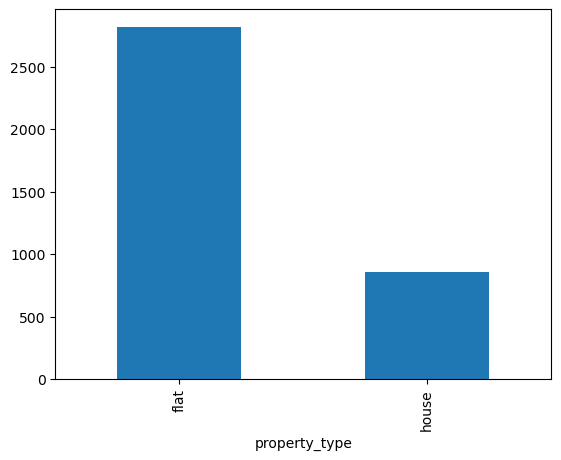

In [25]:
df["property_type"].value_counts().plot(kind="bar")

### Observations

1. Flats are in the majority (75 percent) and there are fewer houses (~25 percent).
2. No missing values in the DataFrame.


In [29]:
df['society'].value_counts().shape

(676,)

In [31]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
uphaar homes                              1
mrg world ultimus                         1
dlf gardencity enclave                    1
kashish manor one                         1
ashok vihar phase iii extension           1
Name: count, Length: 676, dtype: int64

In [33]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
the close north                         0.498433
unitech uniworld resorts                0.502194
mvn athens                              0.505956
Name: proportion, Length: 75, dtype: float64

In [35]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

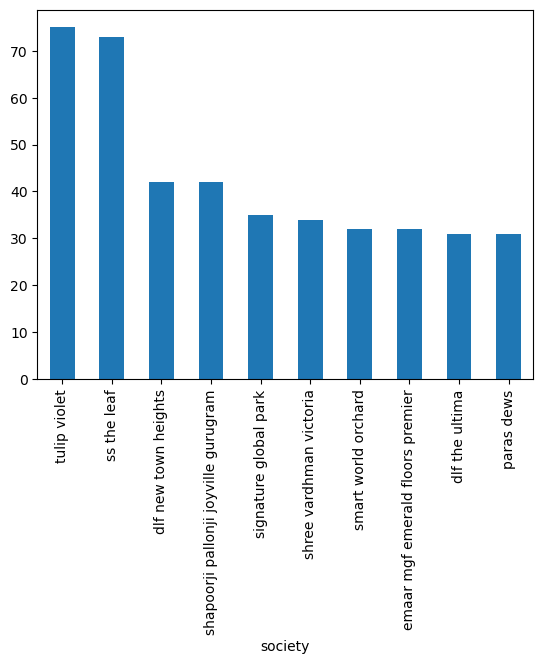

In [37]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [39]:
df['society'].isnull().sum()
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0
3803,NaN,NaN,sector 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


### Observations

- Around 13% of properties come under the independent tag.
- There are 675 societies.
- The top 75 societies have 50% of the properties, and the remaining 50% of the properties come under the remaining 600 societies.

### Property Distribution by Number of Listings in Societies

- **Very High (>100):** Only 1 society has more than 100 listings.
- **High (50-100):** 2 societies have between 50 to 100 listings.
- **Average (10-49):** 92 societies fall in this range with 10 to 49 listings each.
- **Low (2-9):** 273 societies have between 2 to 9 listings.
- **Very Low (1):** A significant number, 308 societies, have only 1 listing.

- There is 2 missing value.


(115,)


<Axes: xlabel='sector'>

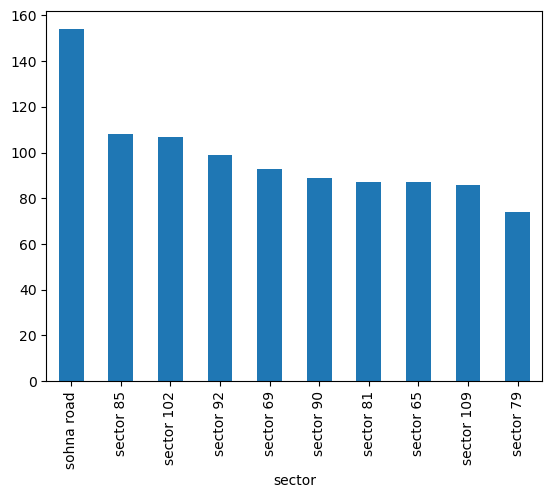

In [45]:
# unique sectors
print(df['sector'].value_counts().shape)
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [47]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

### Observations

- There are a total of 115 unique sectors in the dataset.

### Frequency Distribution of Sectors

- **Very High (>100):** 3 sectors have more than 100 listings.
- **High (50-100):** 25 sectors have between 50 to 100 listings.
- **Average (10-49):** A majority, 63 sectors, fall in this range with 10 to 49 listings each.
- **Low (2-9):** 23 sectors have between 2 to 9 listings.
- **Very Low (1):** Interestingly, there are no sectors with only 1 listing.


In [51]:
df['price'].isnull().sum()

18

In [55]:
df["price"].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

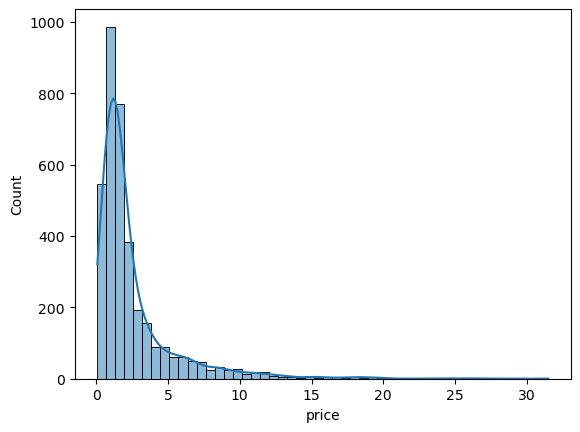

In [57]:
sns.histplot(df['price'], kde=True, bins=50)

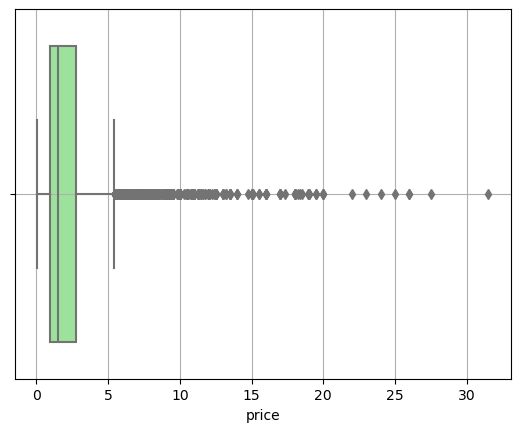

In [59]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

# Descriptive Statistics

- **Count:** There are 3,660 non-missing price entries.
- **Mean Price:** The average price is approximately 2.53 crores.
- **Median Price:** The median (or 50th percentile) price is 1.52 crores.
- **Standard Deviation:** The prices have a standard deviation of 2.98, indicating variability in the prices.
- **Range:** Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- **IQR:** The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

# Visualizations

- **Distribution:** The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- **Box Plot:** The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- **Missing Values:** There are 18 missing values in the price column.


In [63]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134615 14.933372629214254


# Skewness and Kurtosis

- **Skewness:** The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

- **Kurtosis:** The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.


In [66]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

### Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [71]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [73]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)


-1.7500000000000002 5.45


In [75]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [77]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

### Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

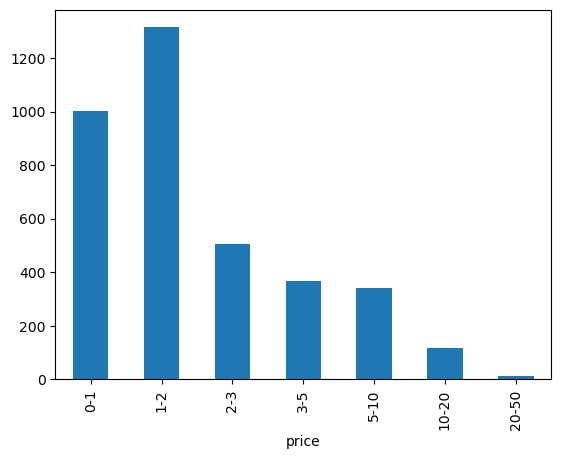

In [83]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

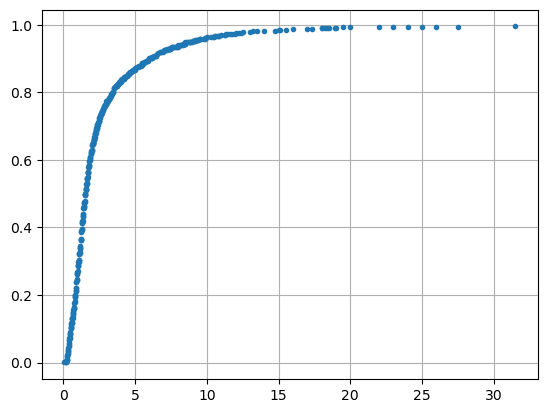

In [85]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


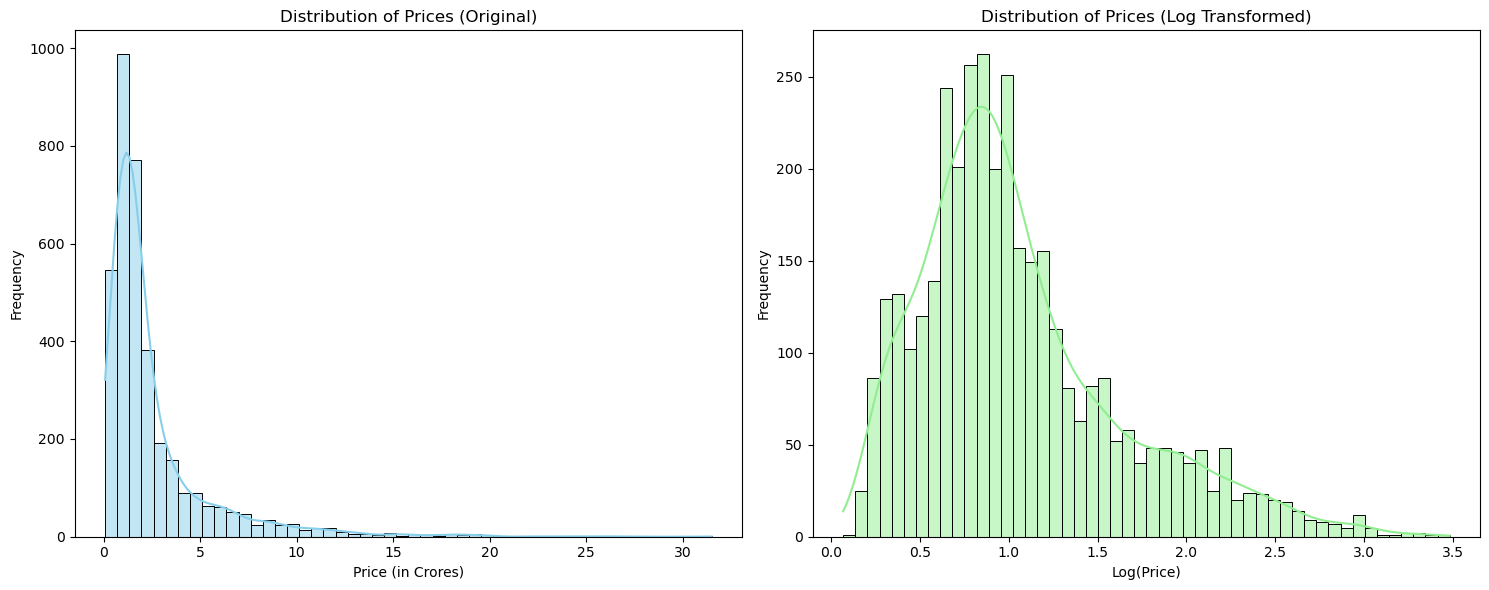

In [87]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [90]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449274


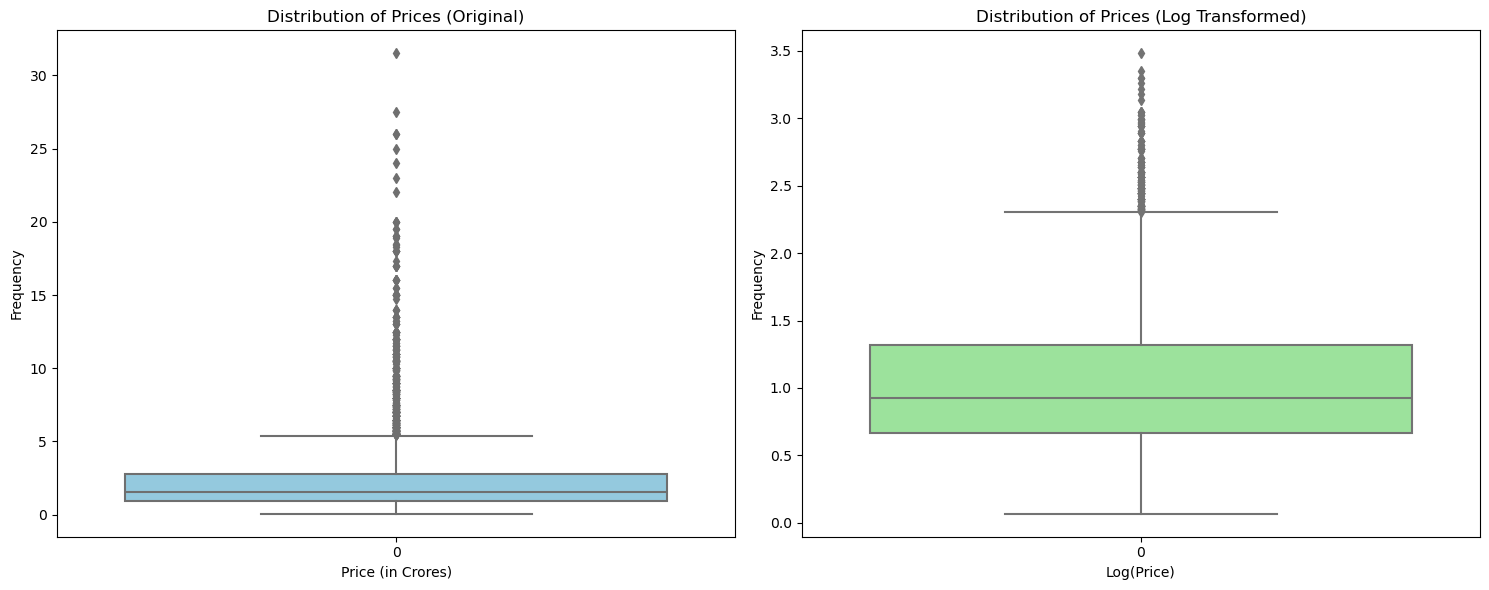

In [92]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## price_per_sqft

In [95]:
df['price_per_sqft'].isnull().sum()

18

In [97]:
df['price_per_sqft'].describe()


count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

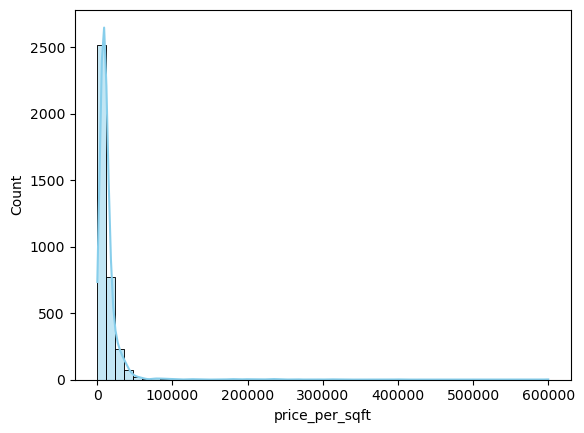

In [99]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: >

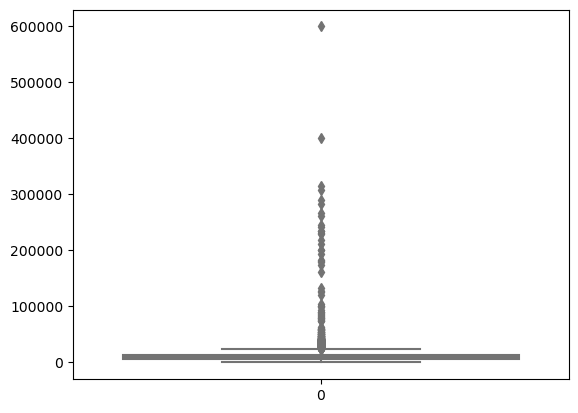

In [101]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### Observations
- Potential Outliers
- Right Skewed
- 17 missing values

## bedRoom

In [103]:
df['bedRoom'].isnull().sum()

1

<Axes: xlabel='bedRoom'>

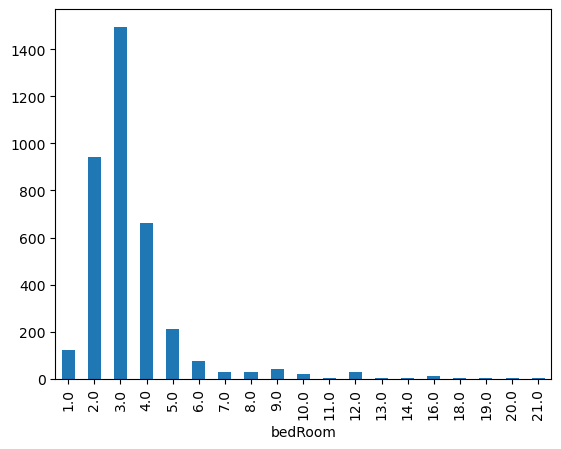

In [105]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

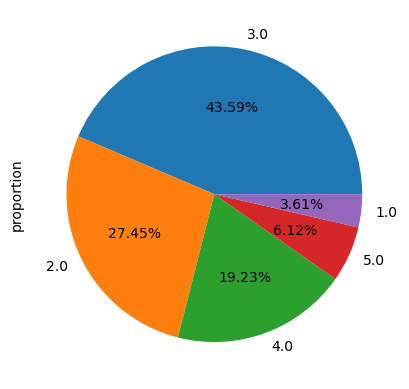

In [107]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [112]:
df['bathroom'].isnull().sum()

1

<Axes: xlabel='bathroom'>

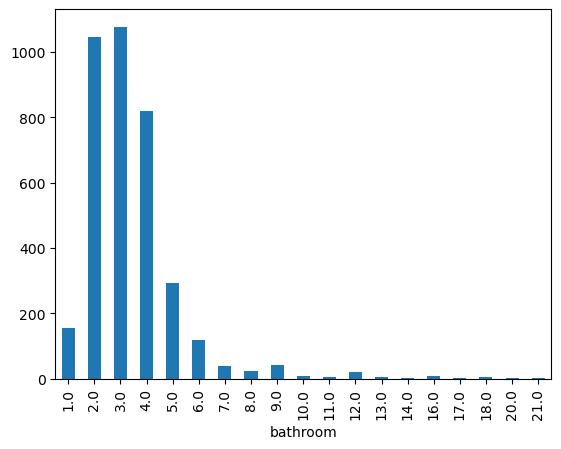

In [114]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

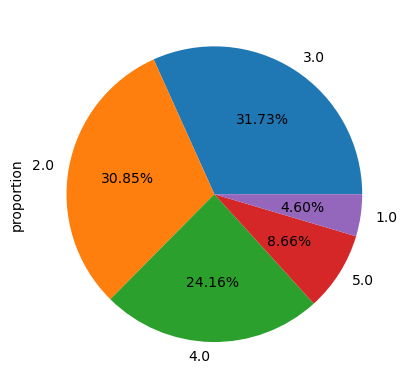

In [116]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [118]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,...,NaN,360.0,NaN,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,...,1760.0,NaN,NaN,0,0,0,0,1,0,35
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,...,NaN,900.0,NaN,0,0,0,0,1,2,35
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,...,2132.0,NaN,NaN,0,1,0,0,0,1,168
4,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.0,0,1,0,0,0,2,61


## balcony

In [121]:
df['balcony'].isnull().sum()

1

<Axes: xlabel='balcony'>

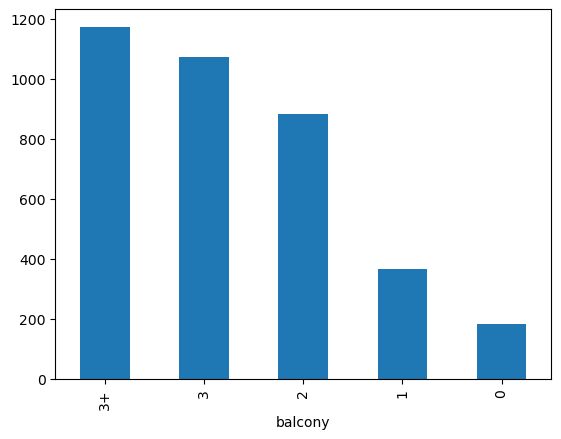

In [123]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

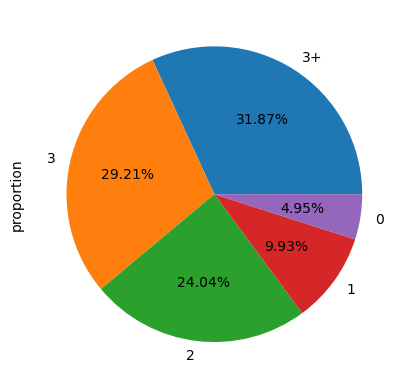

In [125]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum

In [128]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,Relatively New,NaN,360.0,NaN,1,1,1,1,0,2,103
1,0.0,NaN,New Property,1760.0,NaN,NaN,0,0,0,0,1,0,35
2,3.0,North,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,2,35
3,6.0,East,New Property,2132.0,NaN,NaN,0,1,0,0,0,1,168
4,3.0,North-East,New Property,NaN,2660.0,2500.0,0,1,0,0,0,2,61


In [130]:
df['floorNum'].isnull().sum()

20

<Axes: xlabel='floorNum'>

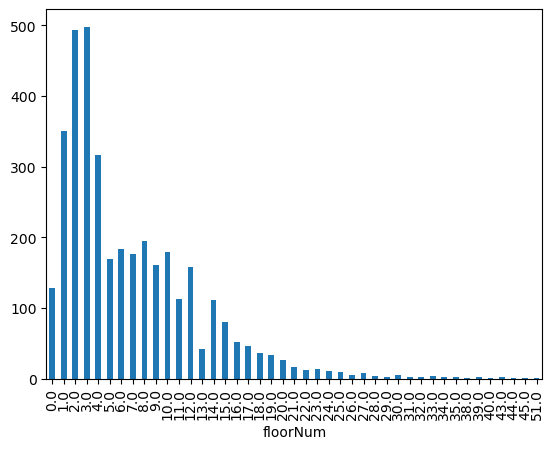

In [132]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

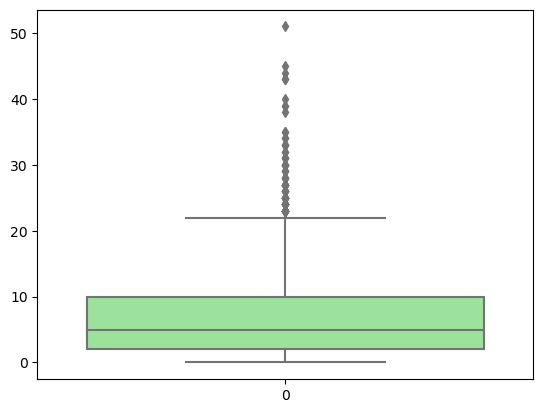

In [134]:
sns.boxplot(df['floorNum'], color='lightgreen')


- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [140]:
print(df['facing'].isnull().sum())
df['facing'].fillna('NA',inplace=True)
df['facing'].value_counts()

1046


facing
NA            1046
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [143]:
print(df['agePossession'].isnull().sum())

df['agePossession'].value_counts()

0


agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              307
Old Property           303
Under Construction     266
Name: count, dtype: int64

### areas

In [146]:
# super built up area
df['super_built_up_area'].isnull().sum()

1803

In [148]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Count'>

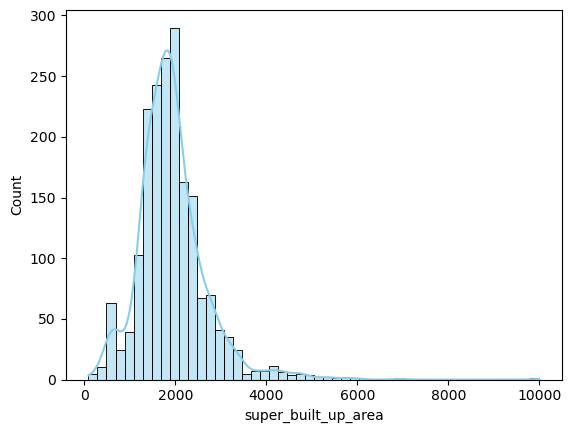

In [150]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

In [160]:
cleaned_data = df['super_built_up_area'].dropna()


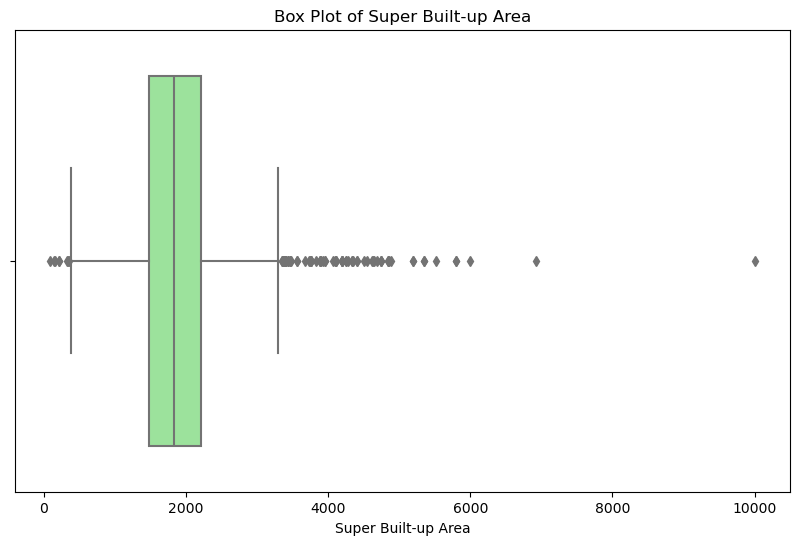

In [162]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_data, color='lightgreen')
plt.title('Box Plot of Super Built-up Area')
plt.xlabel('Super Built-up Area')
plt.show()

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [165]:
# built up area
print(df['built_up_area'].isnull().sum())
df['built_up_area'].describe()

1988


count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Count'>

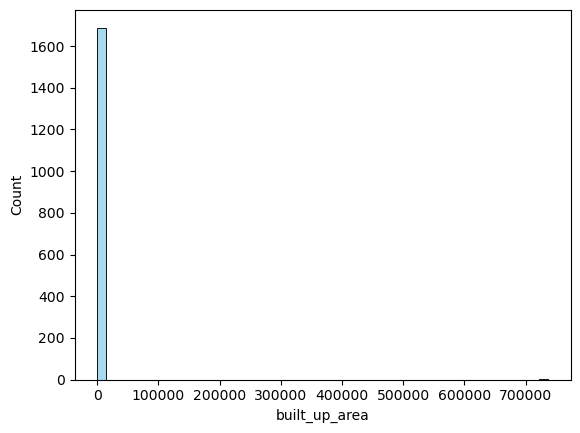

In [167]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [170]:
# carpet area
print(df['carpet_area'].isnull().sum())
df['carpet_area'].describe()

1806


count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Count'>

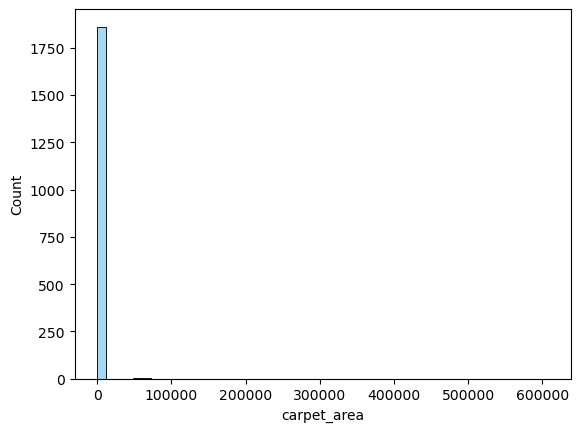

In [172]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

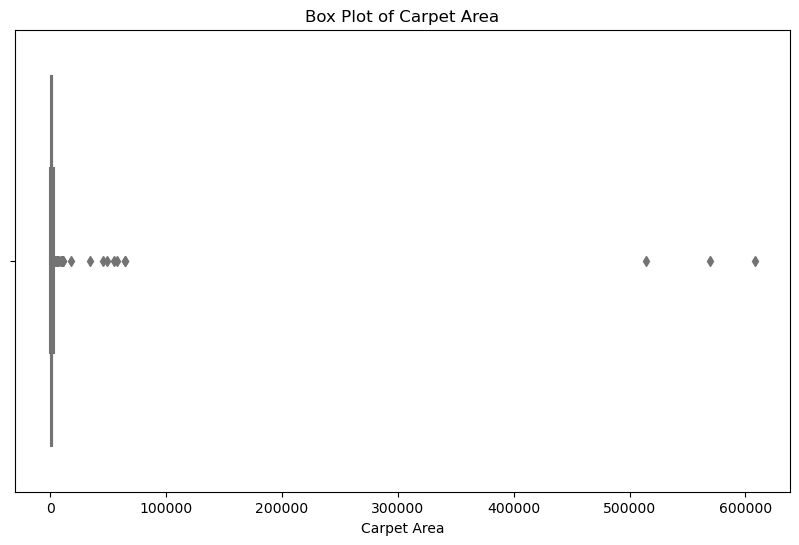

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['carpet_area'].dropna(), color='lightgreen')
plt.title('Box Plot of Carpet Area')
plt.xlabel('Carpet Area')
plt.show()

In [180]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1,1,1,1,0,2,103
1,0,0,0,0,1,0,35
2,0,0,0,0,1,2,35
3,0,1,0,0,0,1,168
4,0,1,0,0,0,2,61
...,...,...,...,...,...,...,...
3799,0,0,0,0,1,0,14
3800,0,0,0,0,0,2,5
3801,0,0,0,0,0,0,109
3802,0,0,0,0,0,0,158


### additional rooms

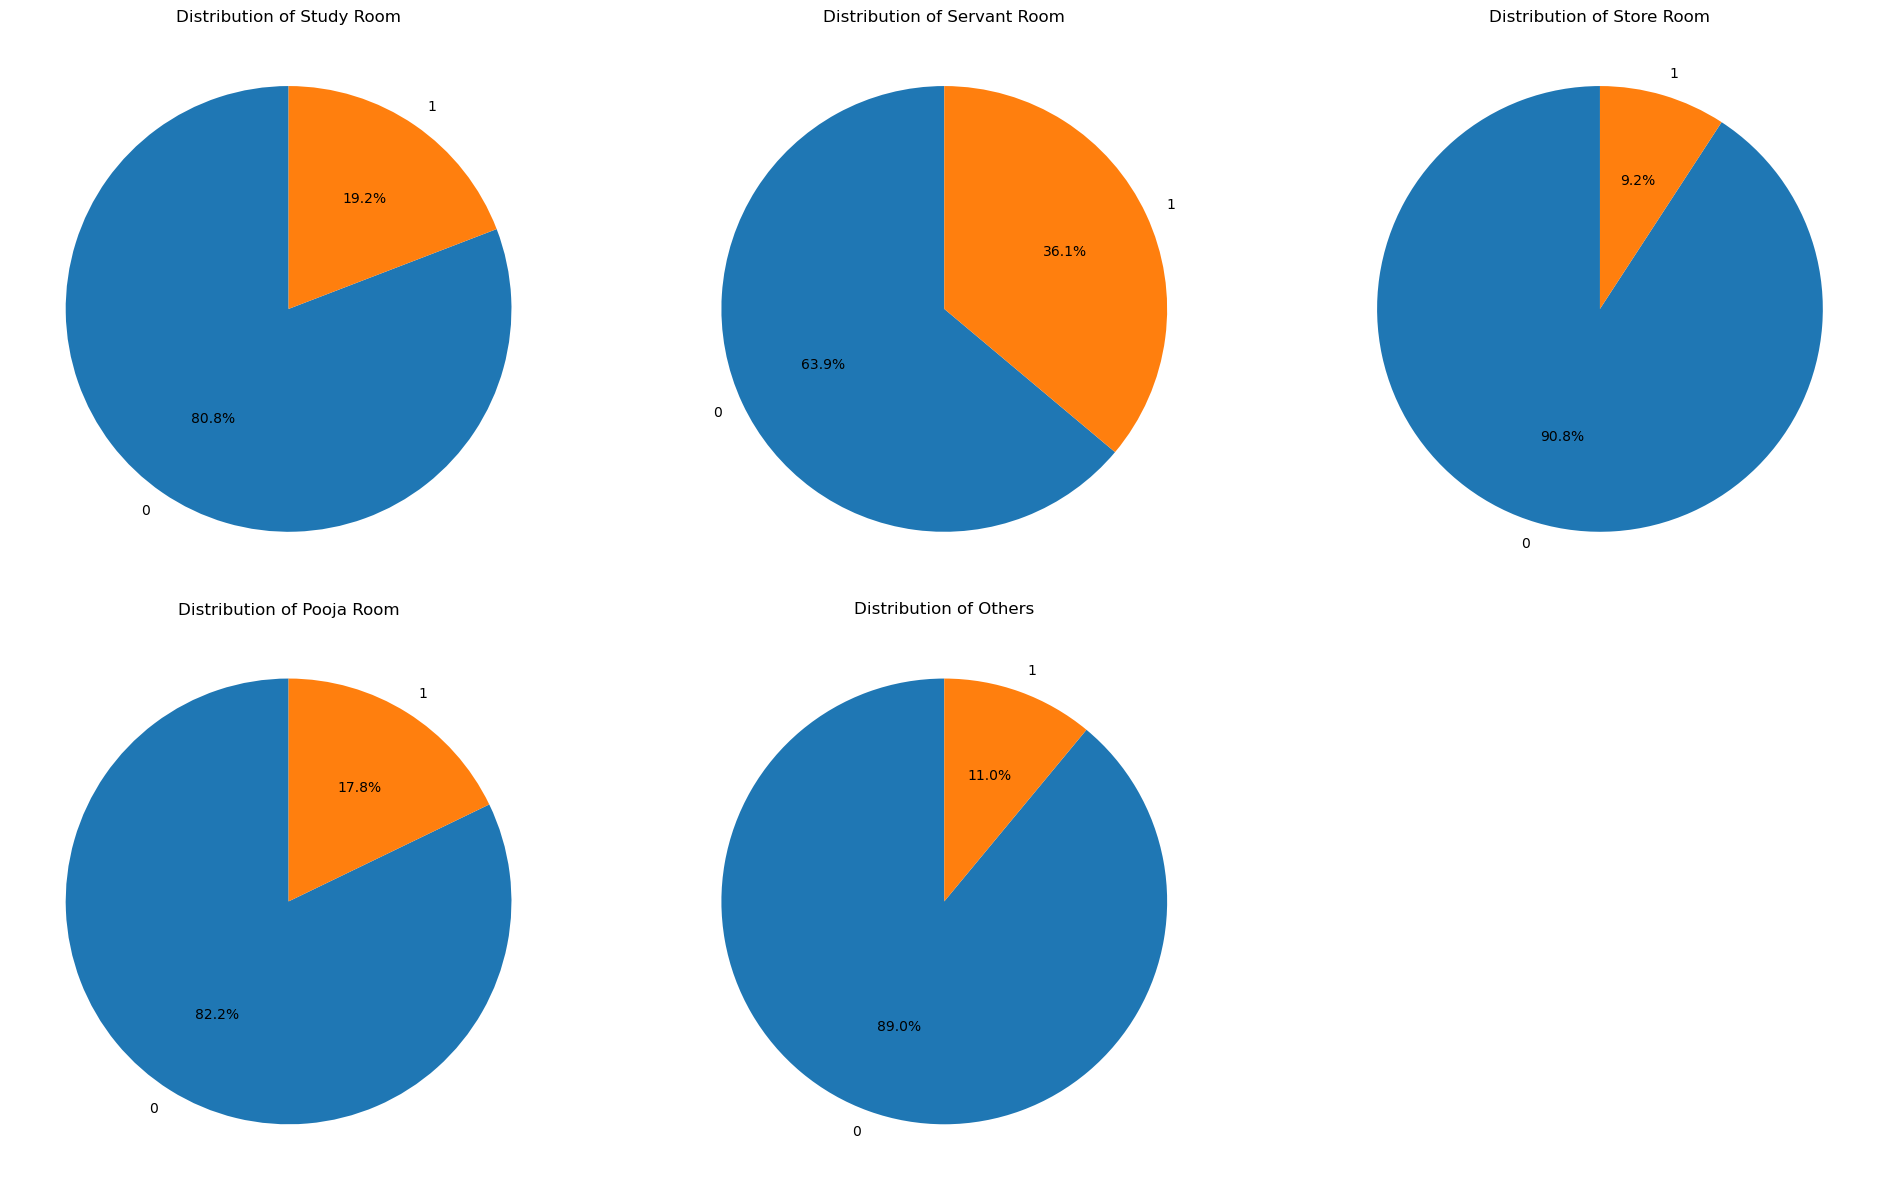

In [183]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

<Axes: ylabel='count'>

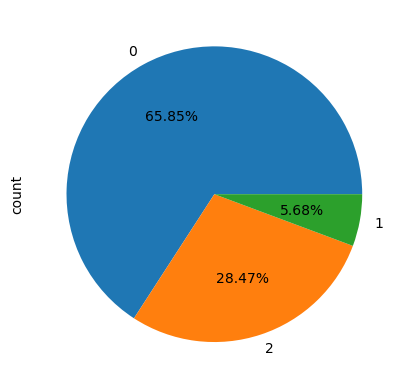

In [186]:
df['furnishing_type'].value_counts()

df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

0
count    3678.000000
mean       71.493475
std        53.064970
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Count'>

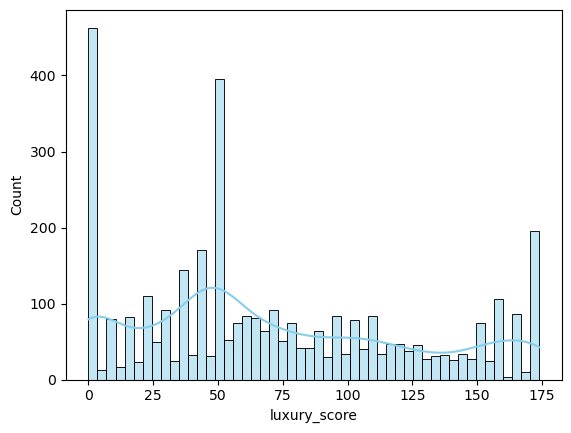

In [189]:
print(df['luxury_score'].isnull().sum())

print(df['luxury_score'].describe())

sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

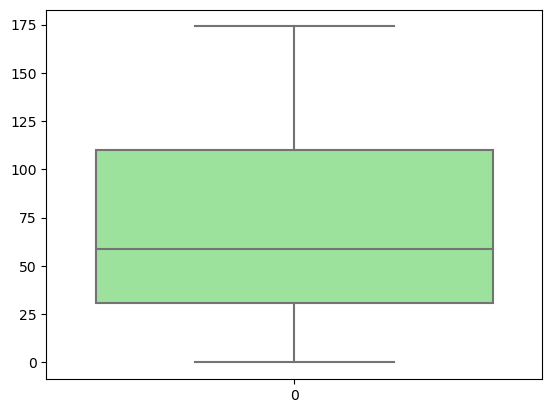

In [191]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [194]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,...,NaN,360.0,NaN,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,...,1760.0,NaN,NaN,0,0,0,0,1,0,35
2,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3.0,3.0,2,...,NaN,900.0,NaN,0,0,0,0,1,2,35
3,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,...,2132.0,NaN,NaN,0,1,0,0,0,1,168
4,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.0,0,1,0,0,0,2,61
